# Assignment 4 - Unsupervised Learning and More Supervised Learning

## *Ana Belen Barcenas Jimenez*
Netid:  *ab713*

## 1

### [35 points] Clustering

Clustering can be used to determine structure, assign group membership, and representing data through compression. Here you'll dive deeply into clustering exploring the impact of a number of classifiers on 

**(a)** Implement your own k-means algorithm. Demonstrate the efficacy of your algorithm on the `blobs` dataset from `scikit-learn` with 2 and 5 cluster centers. For each implementation rerun the k-means algorithm for values of k from 1 to 10 and for each plot the "elbow curve" where you plot the sum of square error. For each case, where is the elbow in the curve? Explain why.

**(b)** Briefly explain in 1-2 sentences each (and at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering

**(c)** For each of the clustering algorithms in (b) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance. Plot the final result as a 4-by-5 subplot showing the performance of each method on each dataset. Which methods work best/worst on each dataset and why?
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

**ANSWER**

#### (a)

In [160]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [402]:
# Creating datasets
from sklearn.datasets.samples_generator import make_blobs
X1, y1 = make_blobs(n_samples=500, centers=2, random_state=2)
X2, y2 = make_blobs(n_samples=500, centers=5, random_state=4)

In [403]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

#### Centers = 2

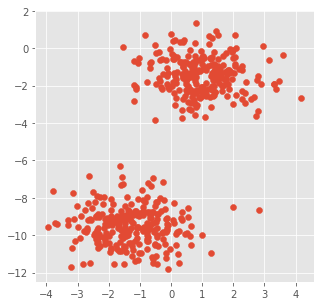

In [404]:
# Plotting data with centers = 2 
plt.figure(figsize=(5,5))
c1 = X1[:,0]
c2 = X1[:,1]
plt.scatter(c1, c2)

#### Centers = 5

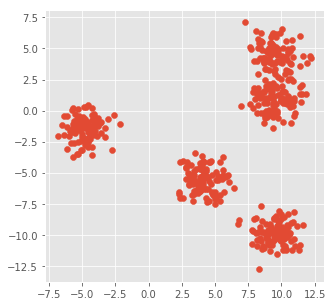

In [405]:
# Plotting data with centers = 5 
plt.figure(figsize=(5,5))
c1 = X2[:,0]
c2 = X2[:,1]
plt.scatter(c1, c2)

In [412]:
def my_kmeans(X1, k, tol=1e-6):
    # X coordinates of random centroids
    C_x = np.random.randint(np.min(X1), np.max(X1), size=k)
    # Y coordinates of random centroids
    C_y = np.random.randint(np.min(X1), np.max(X1), size=k)
    C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

    # To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
    # Cluster Labels(0, 1, 2)
    clusters = np.zeros(len(X1))
    # Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old, None)
    # sqr error initialized to zero
    sqr_error = 0

    # Loop will run till the error becomes zero
    delta = np.infty
    while delta > tol:
    #while error != 0:
        # Assigning each value to its closest cluster
        for i in range(len(X1)):
            distances = dist(X1[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
            sqr_error += min(distances)**2 
            
        # Storing the old centroid values
        C_old = deepcopy(C)
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [X1[j] for j in range(len(X1)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        #error = dist(C, C_old, None)
        delta = np.sum((C - C_old)**2)

    return(k, sqr_error)


/Users/anabelen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/anabelen/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


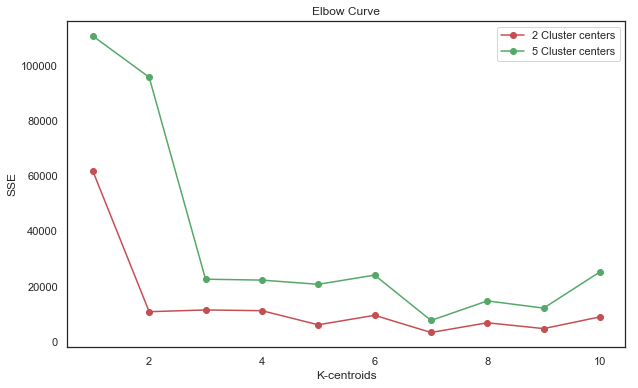

In [604]:
list_blobs2=[]
list_blobs5=[]

for k in range(1,11):
    _,a = my_kmeans(X1, k)
    _,b = my_kmeans(X2, k)
    list_blobs2.append(a)
    list_blobs5.append(b)

plt.figure(figsize=(10,6))
plt.plot(range(1,11),list_blobs2,'-o', color='r',label="2 Cluster centers")
plt.plot(range(1,11),list_blobs5,'-o',color='g',label="5 Cluster centers")
plt.title("Elbow Curve")
plt.xlabel("K-centroids")
plt.ylabel("SSE")
plt.legend()
plt.show()

Given the Elbow curve above, when the number of centroids is 5 the elbow seems to be where k=3. This can be explained because when k>3 the drop in SSE when k increses is way smaller than when k<3. In the case with 2 centroids, the elbow seems to be where k=2 for the same reason related with the rate at which SSE decreases when k increases. 

In both cases when k increases SSE decreases. However, selecting a greater k can lead us to overfit the training data. Thus, it is a better and more conservative option to choose the hyperparameter k that is smaller and reduces the SSE enough compares with previous number of clusters.

Source: https://mubaris.com/posts/kmeans-clustering/

**(b)**

**K-Means:**

This clustering technique defines k number of centroids and then each point is assigned to the closests centroid (cluster) measured by Euclidean or other distance measurements. Each data point is assigned to only one cluster and k-means tends to perform better when groups of data points are round shaped.

**Agglomerative clustering:**

This technique starts with a cluster for each single data point and then agglomerates pairs of clusters with the smallest distance metric selected. This process is repeated until the desired number of clusters is reached. It can be run until every data point is assigned to the same cluster.

**DBSCAN:**

This algorithm begins with a random data point and starts measuring the distance with other data points. A epsilon is defined and based on this value, if the distance of one point with another is less than epsilon, both are assigned to the same group. A cluster is defined if the number of points assigned to it is greater than a specific minimum number of observations defined, otherwise, those points are marked as noise. This process is repeated until all data points are "visited" and assigned to a cluster.

**Spectral clustering:**

This approach is about how connected a group of points are instead of how close is one point to another. The algorithm creates an affinity (similarity) matrix whose principal components are calculated. Once the dimension of the data is reduced after applying PCA, a clustering algorithm such as K-Means is employed to get the final clusters.

Sources:

https://arxiv.org/pdf/1802.06971.pdf 

https://medium.com/clustering-with-gaussian-mixture-model/clustering-with-gaussian-mixture-model-c695b6cd60da

https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

**(c)**

In [456]:
# Import datasets
aggregation = pd.read_csv('/Users/anabelen/Documents/MIDS/Spring 2019/Intro. to ML/aggregation.csv', sep=';', header=None)
compound = pd.read_csv('/Users/anabelen/Documents/MIDS/Spring 2019/Intro. to ML/compound.csv', sep=';', header=None)
D31 = pd.read_csv('/Users/anabelen/Documents/MIDS/Spring 2019/Intro. to ML/D31.csv', sep=';', header=None)
jain = pd.read_csv('/Users/anabelen/Documents/MIDS/Spring 2019/Intro. to ML/jain.csv', sep=';', header=None)

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN

datalist = [aggregation, compound, D31, jain]

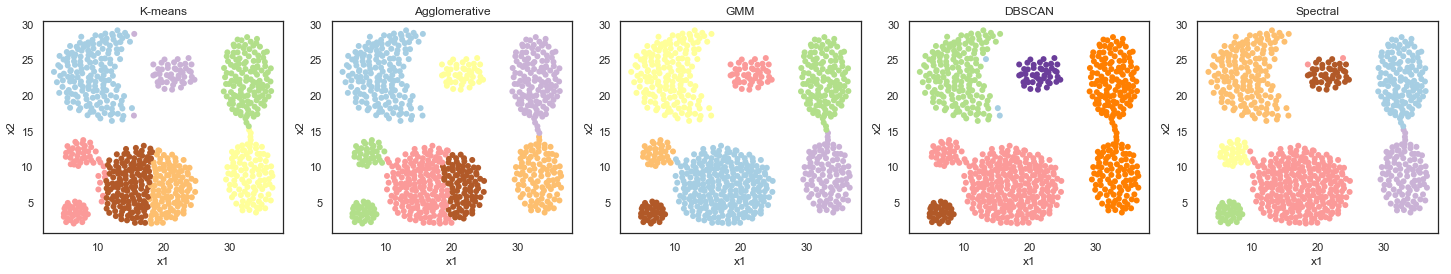

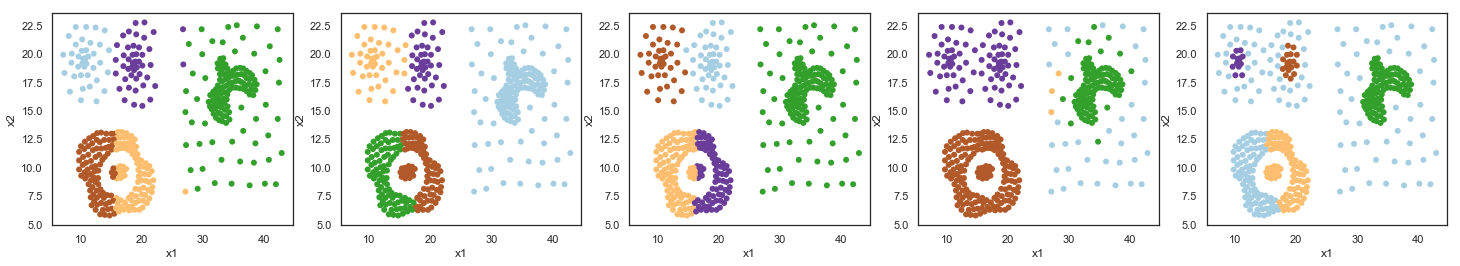

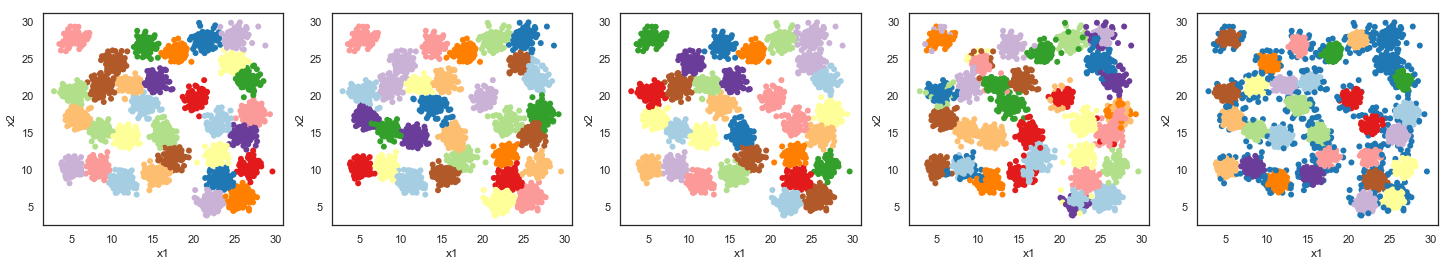

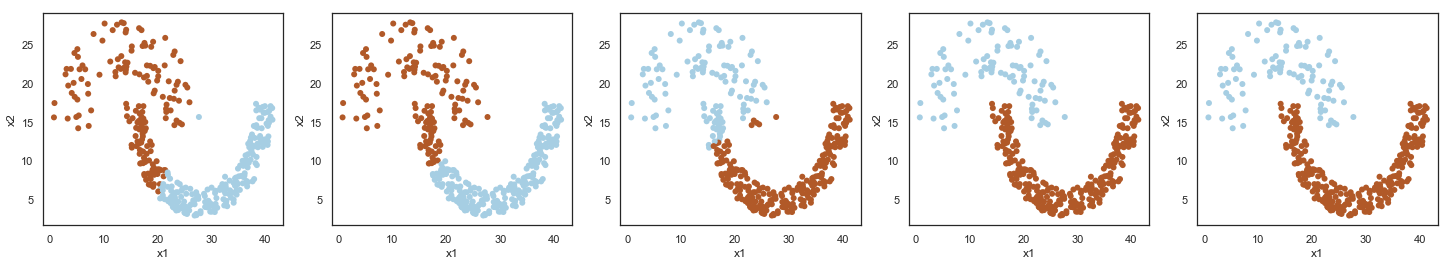

In [523]:
num_clust = [7, 5, 31, 2]
gmm_covariancep =['full', 'spherical', 'spherical', 'tied']
j = 1
for i in range(len(datalist)):
    data = datalist[i]
    k = num_clust[i]
    #KMeans
    km = KMeans(n_clusters = k ,n_init=10, random_state= 409).fit(data.iloc[:,0:2])
    kmlabels = km.labels_
    #AgglomerativeClustering
    ac = AgglomerativeClustering(k).fit(data.iloc[:,0:2])
    aclabels = ac.labels_
    #GaussianMixture
    gmm = GaussianMixture(k, n_init = 5, 
                          covariance_type= gmm_covariancep[i]).fit(data.iloc[:,0:2])
    gmmlabels = gmm.predict(data.iloc[:,0:2])
    #DBSCAN
    dmbscanp = [(1.3, 5),(2, 4),(0.3,1),(2.5,15)]
    dbscan = DBSCAN(eps=dmbscanp[i][0], 
                    min_samples=dmbscanp[i][1]).fit(data.iloc[:,0:2])
    dbscanlabels = dbscan.labels_
    #SpectralClustering
    sc = SpectralClustering(n_clusters = k, 
                            random_state=409).fit(data.iloc[:,0:2])
    sclabels = sc.labels_
    # Plotting results
    labels = [kmlabels, aclabels, gmmlabels, dbscanlabels, sclabels]
    titles = ['K-means', 'Agglomerative', 'GMM', 'DBSCAN', 'Spectral']
    plt.figure(figsize=(25, 18))
    for label in labels:
        plt.subplot(4, 5, j)
        plt.scatter(data.iloc[:,0],data.iloc[:,1],
                    edgecolor = 'None',c = label, cmap ='Paired')
        plt.xlabel('x1')
        plt.ylabel('x2')
        if j <= 5:
            plt.title(titles[j-1])
        else:
            pass
        j += 1
plt.show()
                      


From the plots above it is evident that some clustering algorithms perform better than others in datapoints with different shapes. K-means, agglomerative clustering, and GMM perform particularly better in datasets where there are collections of points grouped in circular and compact shapes such as the data plotted in the third row of the diagram. When the points are grouped in different shapes such as the datasets in the first and last rows of the diagram, clustering algorithms such as DBSCAN and spectral clustering performs better due to its conectedness approach. 

The dataset plotted in the second row has different types of aggrupations. Some of them should be treated with a clustering technique focused on how connected the datapoints are (the collection of points forming a donut shape) and the other agglomerations could be well separated employing a clustering techniques focused on how compact a group of points are.

## 2

### [25 points] Visualizing and clustering digits with PCA and t-SNE

**(a)** Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the resulting 2-dimensional representation of the data.

**(b)** t-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/). A video introducing this method can be found [here](https://www.youtube.com/watch?v=RJVL80Gg3lA&list=UUtXKDgv1AVoG88PLl8nGXmw) for those who are interested.

*NOTE: An important note on t-SNE is that it is an example of transductive learning. This means that the lower dimensional representation of the data is only applicable to the specific input data - you can't just add a new sample an plot it in the sample 2-dimensional space without entirely rerunning the algorithm and finding a new representation of the data.*

**(c)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? Given the comparative clustering performance that you observed and the note on t-SNE above, what are the pros and cons of PCA and t-SNE? *Note: You typically will not have labels available.*

**ANSWER**

**(a)**

In [496]:
# Loading scikit-learn digits dataset
from sklearn.datasets import load_digits
digits = load_digits(return_X_y=True)
print(digits[0].shape)

X_digits = digits[0]
y_digits = digits[1]

(1797, 64)


In [510]:
# Normalize the data before processing the PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()
from matplotlib.colors import ListedColormap

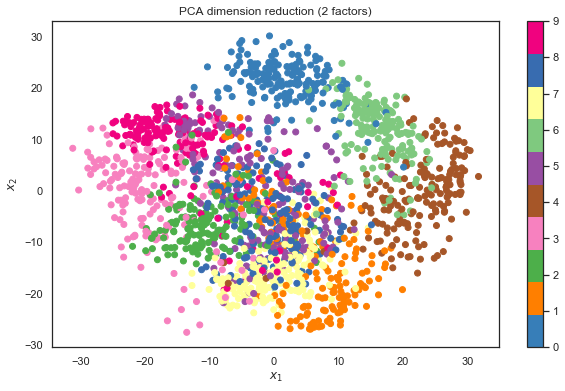

In [515]:
# PCA
sklearn_pca = PCA(n_components=2).fit(X_digits).transform(X_digits)
colors = ListedColormap(['#377eb8', '#ff7f00', '#4daf4a',
                         '#f781bf', '#a65628', '#984ea3','#7fc97f', 
                         '#ffff99', '#386cb0', '#f0027f'])

plt.figure(figsize=(10,6))
sns.set_style("white")
plt.title("PCA dimension reduction (2 factors)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.scatter([x[0] for x in sklearn_pca],
            [x[1] for x in sklearn_pca],c=y_digits,cmap=colors)
plt.colorbar()
plt.show()

Source: 

https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html#sphx-glr-auto-examples-compose-plot-digits-pipe-py

https://charlesreid1.github.io/circe/Digit%20Classification%20-%20PCA.html

**(b)**

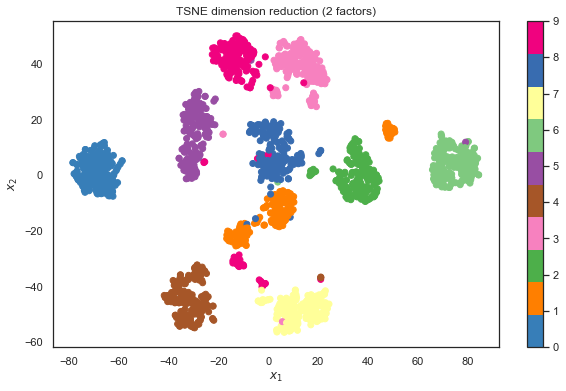

In [520]:
# TSNE
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_digits)

plt.figure(figsize=(10,6))
sns.set_style("white")
plt.title("T-SNE dimension reduction (2 factors)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.scatter([x[0] for x in X_embedded],
            [x[1] for x in X_embedded],c=y_digits,cmap=colors)
plt.colorbar()
plt.show()

**(c)**

From the plots above, it is clear that t-SNE dimensionality reduction techniques performs better than PCA. The reason could be that the math behind the t-SNE method is computing non-linear transformations instead of the linear approach that PCA takes. 

**PCA**: PCA as a dimensionality reduction technique is more computationally efficient compared with t-SNE and could perform well in strongly correlated datasets.

**t-SNE**: The t-SNE running time is way slower compared with PCA. This could be a problem when trying to reduce the dimensionality of bigger datasets. However, due to the complexity of the math behind the method, it could perform better than PCA when defining clusters.

## 3

### [30 points] PCA for compression

From the digits dataset, extract all the 5's. Your going to create a compressed version of one of an image.

**(a)** Plot a number of examples of the original images.

**(b)** Perform PCA on the data. Create a plot showing the fraction of variance explained as you incorporate from $1$ to $N$ components. 

**(c)** Select an image (from your dataset of 5's) that you will "compress" using PCA. Use the principal components extracted in (b) for data compression: choose the top $k$ principal components and represent the data using a subset of the total principal components. Plot the original image, and compressed versions with different levels of compression (i.e. using different numbers of the top principal components): use $k=1,5,10,25$.

**(d)** How many principal components are required to well-approximate the data in (c)? How much compression is achieved in each case (express compression as the ratio of $k$ to the original dimension of the data $D$, so it ranges from $0$ to $1$). Comment on each case.

**ANSWER**

**(a)**

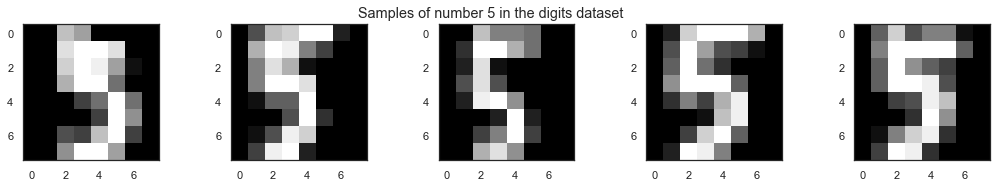

In [549]:
# Create new dataset extracting only number 5
fives = np.where(y_digits==5)[0] 
X_5 = X_[fives]

plt.figure(figsize=(18,2.5))
plt.suptitle("Samples of number 5 in the digits dataset")
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_5[i].reshape(8,8),cmap='gray')
    pass
plt.show()

**(b)**

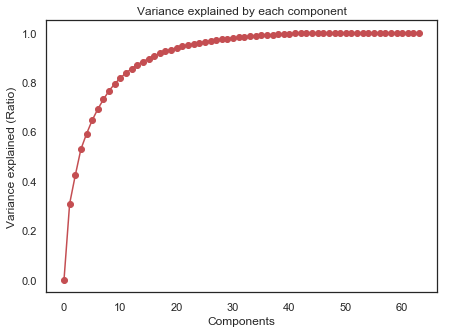

In [605]:
# PCA from 1 to N components
from sklearn.decomposition import PCA
var_explained = []
N = X_5.shape[1]
for i in range(N):
    pca = PCA(n_components=i)
    projected = pca.fit(X_5).transform(X_5)
    var_explained.append(sum(pca.explained_variance_ratio_))
    
plt.figure(figsize=(7,5))
plt.plot(np.arange(N),np.array(var_explained),'-o', color='r')
plt.title("Variance explained by each component")
plt.xlabel("Components")
plt.ylabel("Variance explained (Ratio)")
plt.show()

**(c)**

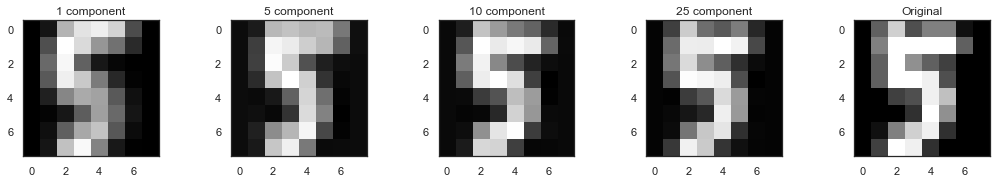

In [624]:
k = [1,5,10,25]

plt.figure(figsize=(18,2.5))
for i in range(len(k)):
    pca = PCA(k[i])
    pcaComps = pca.fit(X).transform(X)
    xCompressed = pca.inverse_transform(pcaComps)
    plt.subplot(1,5,i+1)
    plt.imshow(xCompressed[4].reshape(8,8),cmap='gray')
    plt.title("{} component".format(k[i]))
plt.subplot(1,5,5)
plt.imshow(X[4].reshape(8,8),cmap='gray')
plt.title("Original")
plt.show()

**(d)**

How many principal components are required to well-approximate the data in (c)? How much compression is achieved in each case (express compression as the ratio of  kk  to the original dimension of the data  DD , so it ranges from  00  to  11 ). Comment on each case.

In my opinion, the compressed version of the image with 10 components seems pretty similar to the one with 25 components and both approximate the original image really well. I would say that 10 components are good enough to approximate the original 64 * 64 image.

Compression achieved:

* 1 component: $1-\frac{1}{64} = \frac{63}{64}=0.98$


* 5 component: $1-\frac{5}{64} = \frac{59}{64}=0.92$


* 10 component: $1-\frac{10}{64} = \frac{54}{64}=0.84$


* 25 component: $1-\frac{25}{64} = \frac{39}{64}=0.61$

In the 4 cases the compression achieved is greater than 50% of the original dataset, and despite the dimensionality reduction, since the first case with 1 component it is possible to identify the number in the original digit. Choosing a 10 component compression as mentioned above, drives to a compression of 84% of the original data and output a pretty similar image.

## 4

### [15 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

**(b)** Create a training and test dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset. Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one, and the test data on the other. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve.

**(c)** Suggest at least two ways in which you neural network implementation could be improved.

**ANSWER**